In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Delete columns with mostly null values

In [5]:
train.drop(['Alley'], axis=1, inplace=True)
train.drop(['FireplaceQu'], axis=1, inplace=True)
train.drop(['PoolQC'], axis=1, inplace=True)
train.drop(['Fence'], axis=1, inplace=True)
train.drop(['MiscFeature'], axis=1, inplace=True)

fill null values with mean or the most common value 

In [6]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['BsmtQual'] = train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['BsmtCond'] = train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtExposure'] = train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtFinType1'] = train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
train['GarageType'] = train['GarageType'].fillna(train['GarageType'].mode()[0])
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['GarageFinish'] = train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual'] = train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageCond'] = train['GarageCond'].fillna(train['GarageCond'].mode()[0])

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<AxesSubplot:>

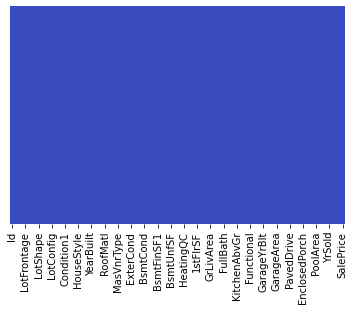

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

now we know we dont have null values and move on to one hot encoding for categorical features

In [9]:
def one_hot_encoding(final_df,multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:     
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)      
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:           
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
               
    df_final=pd.concat([final_df,df_final],axis=1)        
    return df_final

In [10]:
cat_columns = ['MSSubClass','MSZoning','Street','LotShape','LandContour',
               'Utilities','LotConfig','LandSlope','Neighborhood',
               'Condition2','BldgType','Condition1','HouseStyle','SaleType',
               'SaleCondition','Foundation',
               'BsmtExposure','BsmtFinType1','BsmtFinType2',
               'RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
               'MasVnrType','Heating','CentralAir','Electrical',
               'Functional','GarageType',
               'GarageFinish','PavedDrive']

In [11]:
train = one_hot_encoding(train, cat_columns)

MSSubClass
MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
Foundation
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
CentralAir
Electrical
Functional
GarageType
GarageFinish
PavedDrive


for values that represent quality transform them into numbers

In [12]:
qual_columns = ['ExterQual','ExterCond','BsmtQual','BsmtCond',
                'HeatingQC','KitchenQual','GarageQual','GarageCond']

In [13]:
def get_int_qual(df, qual_columns):
    df_temp = df.copy()
    for col in qual_columns:
        df_temp.loc[df_temp[col] == 'Ex', col] = 5
        df_temp.loc[df_temp[col] == 'Gd', col] = 4
        df_temp.loc[df_temp[col] == 'TA', col] = 3
        df_temp.loc[df_temp[col] == 'Fa', col] = 2
        df_temp.loc[df_temp[col] == 'Po', col] = 1
        df_temp.loc[df_temp[col] == 'NA', col] = 0
        df_temp[col] = df_temp[col].astype(int)
    return df_temp

In [14]:
train = get_int_qual(train, qual_columns)

delete id column

In [15]:
train.drop(['Id'], axis=1, inplace=True)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 226 entries, LotFrontage to Y
dtypes: float64(3), int32(8), int64(33), uint8(182)
memory usage: 715.9 KB


In [17]:
pd.set_option('display.max_rows', None)

In [18]:
train.columns

Index([ 'LotFrontage',      'LotArea',  'OverallQual',  'OverallCond',
          'YearBuilt', 'YearRemodAdd',   'MasVnrArea',    'ExterQual',
          'ExterCond',     'BsmtQual',
       ...
                'Typ',       'Attchd',      'Basment',      'BuiltIn',
            'CarPort',       'Detchd',          'RFn',          'Unf',
                  'P',            'Y'],
      dtype='object', length=226)

Normalise data

In [19]:
norm_cols = ['LotFrontage', 'LotArea','MasVnrArea','BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
            '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF',
            'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','YearBuilt','YearRemodAdd',
            'GarageYrBlt', 'YrSold']


In [20]:
def normalise(df, cols):
    for col in cols:
        df[col] = (df[col] - df[col].mean())/df[col].var()
    return df

In [21]:
train = normalise(train, norm_cols)

In [22]:
train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,Unf,P,Y
count,1.460000e+03,1.460000e+03,1460.000000,1460.000000,1.460000e+03,1.460000e+03,1.460000e+03,1460.00000,1460.000000,1460.000000,...,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1.825024e-17,-6.534917e-21,6.099315,5.575342,3.467546e-17,2.165695e-16,-1.330747e-19,3.39589,3.083562,3.565068,...,0.931507,0.65137,0.013014,0.060274,0.006164,0.265068,0.289041,0.469863,0.020548,0.917808
std,4.540497e-02,1.001877e-04,1.382997,1.112799,3.310940e-02,4.843692e-02,5.538046e-03,0.57428,0.351054,0.678071,...,0.252677,0.47670,0.113372,0.238075,0.078298,0.441521,0.453472,0.499262,0.141914,0.274751
min,-1.011219e-01,-9.251461e-05,1.000000,1.000000,-1.088206e-01,-8.179979e-02,-3.180022e-03,2.00000,1.000000,2.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.071910e-02,-2.974463e-05,5.000000,5.000000,-1.892953e-02,-4.191548e-02,-3.180022e-03,3.00000,3.000000,3.000000,...,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.929725e-17,-1.042230e-05,6.000000,5.000000,1.898885e-03,2.143018e-02,-3.180022e-03,3.00000,3.000000,4.000000,...,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.845150e-02,1.088748e-05,7.000000,6.000000,3.149716e-02,4.489154e-02,1.857518e-03,4.00000,3.000000,4.000000,...,1.000000,1.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,5.008685e-01,2.054975e-03,10.000000,9.000000,4.245948e-02,5.896835e-02,4.589190e-02,5.00000,5.000000,5.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


check for dublicated cilumns

In [23]:
train = train.loc[:,~train.columns.duplicated()]

Check for corraalated columns in correlation matrix

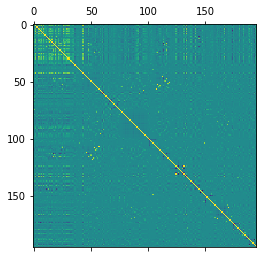

In [24]:
corrMatrix = train.corr()
plt.matshow(corrMatrix)
plt.show()

find columns with correlation > 0.95 and delete one of the pair

In [25]:
for i in range(len(corrMatrix)):
    for j in range(len(corrMatrix)):
        if ((corrMatrix.iloc[i,j]>0.95) & (i!=j)):
            print(i)
            print(j)

53
108
57
107
107
57
108
53
124
131
131
124
160
170
170
160


In [26]:
train.drop([train.columns[108]], axis=1, inplace=True)
train.drop([train.columns[107]], axis=1, inplace=True)
train.drop([train.columns[131]], axis=1, inplace=True)
train.drop([train.columns[170]], axis=1, inplace=True)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 191 entries, LotFrontage to P
dtypes: float64(22), int32(8), int64(14), uint8(147)
memory usage: 666.0 KB


In [28]:
y_train = train['SalePrice']

In [29]:
train.drop(['SalePrice'], axis=1, inplace=True)

Split training and testing data

In [30]:
train_feat = train.iloc[:1095,:]
test_fest = train.iloc[1095:,:]
train_y = y_train.iloc[:1095]
test_y = y_train.iloc[1095:]

Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(train_feat, train_y)

RandomForestRegressor(max_depth=2, random_state=0)

In [32]:
regr.score(test_fest, test_y)

0.6473086967878376

Random forest didnt perform very well, so we try linear regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
reg = LinearRegression().fit(train_feat, train_y)

In [36]:
reg.score(test_fest, test_y)

0.700932873032512

Better, but now try Catboost

In [37]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()

In [38]:
cat.fit(train_feat, train_y)

Learning rate set to 0.041534
0:	learn: 77571.4304481	total: 119ms	remaining: 1m 58s
1:	learn: 75539.7282565	total: 130ms	remaining: 1m 4s
2:	learn: 73449.2170505	total: 142ms	remaining: 47.1s
3:	learn: 71583.3016662	total: 155ms	remaining: 38.6s
4:	learn: 69903.8844768	total: 167ms	remaining: 33.1s
5:	learn: 68304.2157229	total: 180ms	remaining: 29.8s
6:	learn: 66585.6744773	total: 192ms	remaining: 27.2s
7:	learn: 65014.6838561	total: 205ms	remaining: 25.4s
8:	learn: 63481.7334386	total: 216ms	remaining: 23.8s
9:	learn: 61968.0795361	total: 227ms	remaining: 22.5s
10:	learn: 60445.6457563	total: 239ms	remaining: 21.5s
11:	learn: 59167.2534728	total: 250ms	remaining: 20.6s
12:	learn: 57726.0417569	total: 262ms	remaining: 19.9s
13:	learn: 56405.6650765	total: 274ms	remaining: 19.3s
14:	learn: 55183.3697310	total: 285ms	remaining: 18.7s
15:	learn: 53919.7884872	total: 298ms	remaining: 18.3s
16:	learn: 52659.3027446	total: 311ms	remaining: 18s
17:	learn: 51678.7889978	total: 323ms	remainin

165:	learn: 18736.1883443	total: 2.06s	remaining: 10.3s
166:	learn: 18720.8639447	total: 2.07s	remaining: 10.3s
167:	learn: 18707.4118325	total: 2.08s	remaining: 10.3s
168:	learn: 18623.7395101	total: 2.09s	remaining: 10.3s
169:	learn: 18554.9511253	total: 2.1s	remaining: 10.3s
170:	learn: 18507.8839421	total: 2.12s	remaining: 10.3s
171:	learn: 18454.1057604	total: 2.13s	remaining: 10.2s
172:	learn: 18400.5930967	total: 2.14s	remaining: 10.2s
173:	learn: 18350.4251158	total: 2.15s	remaining: 10.2s
174:	learn: 18330.7043906	total: 2.16s	remaining: 10.2s
175:	learn: 18277.7014171	total: 2.17s	remaining: 10.2s
176:	learn: 18214.1932220	total: 2.18s	remaining: 10.2s
177:	learn: 18168.2674022	total: 2.2s	remaining: 10.1s
178:	learn: 18102.8091991	total: 2.21s	remaining: 10.1s
179:	learn: 18067.3229256	total: 2.22s	remaining: 10.1s
180:	learn: 18029.4898453	total: 2.23s	remaining: 10.1s
181:	learn: 18012.1821502	total: 2.25s	remaining: 10.1s
182:	learn: 17966.1707372	total: 2.26s	remaining: 

316:	learn: 14023.4031929	total: 3.78s	remaining: 8.14s
317:	learn: 14016.9777653	total: 3.79s	remaining: 8.13s
318:	learn: 13994.4361943	total: 3.8s	remaining: 8.12s
319:	learn: 13966.8143604	total: 3.81s	remaining: 8.11s
320:	learn: 13935.9615084	total: 3.83s	remaining: 8.09s
321:	learn: 13908.3857155	total: 3.83s	remaining: 8.07s
322:	learn: 13877.9251219	total: 3.85s	remaining: 8.06s
323:	learn: 13853.8507565	total: 3.85s	remaining: 8.04s
324:	learn: 13848.6406859	total: 3.87s	remaining: 8.04s
325:	learn: 13832.6189972	total: 3.88s	remaining: 8.02s
326:	learn: 13800.7056612	total: 3.89s	remaining: 8.01s
327:	learn: 13763.1625987	total: 3.9s	remaining: 8s
328:	learn: 13734.0957748	total: 3.91s	remaining: 7.98s
329:	learn: 13721.6459162	total: 3.92s	remaining: 7.97s
330:	learn: 13701.4606797	total: 3.94s	remaining: 7.96s
331:	learn: 13673.9361683	total: 3.95s	remaining: 7.94s
332:	learn: 13650.5150792	total: 3.96s	remaining: 7.93s
333:	learn: 13611.2384932	total: 3.98s	remaining: 7.9

471:	learn: 11018.6436637	total: 5.5s	remaining: 6.15s
472:	learn: 11015.9862830	total: 5.51s	remaining: 6.14s
473:	learn: 11013.0829248	total: 5.52s	remaining: 6.13s
474:	learn: 11010.5979676	total: 5.53s	remaining: 6.11s
475:	learn: 11008.7617931	total: 5.54s	remaining: 6.1s
476:	learn: 11007.1579934	total: 5.55s	remaining: 6.09s
477:	learn: 11004.4874259	total: 5.56s	remaining: 6.07s
478:	learn: 11002.4913025	total: 5.57s	remaining: 6.06s
479:	learn: 11000.8722350	total: 5.58s	remaining: 6.05s
480:	learn: 10998.2149568	total: 5.59s	remaining: 6.04s
481:	learn: 10996.4917644	total: 5.6s	remaining: 6.02s
482:	learn: 10989.7484498	total: 5.61s	remaining: 6.01s
483:	learn: 10977.5091285	total: 5.62s	remaining: 6s
484:	learn: 10975.6577096	total: 5.63s	remaining: 5.98s
485:	learn: 10951.5067117	total: 5.65s	remaining: 5.97s
486:	learn: 10936.8097592	total: 5.66s	remaining: 5.96s
487:	learn: 10918.7769972	total: 5.67s	remaining: 5.94s
488:	learn: 10910.8113253	total: 5.68s	remaining: 5.93

627:	learn: 9178.2969353	total: 7.22s	remaining: 4.28s
628:	learn: 9151.3832456	total: 7.23s	remaining: 4.26s
629:	learn: 9141.4542284	total: 7.24s	remaining: 4.25s
630:	learn: 9136.8345859	total: 7.25s	remaining: 4.24s
631:	learn: 9124.1785237	total: 7.26s	remaining: 4.23s
632:	learn: 9118.4532788	total: 7.27s	remaining: 4.22s
633:	learn: 9105.4283354	total: 7.28s	remaining: 4.2s
634:	learn: 9099.0071853	total: 7.3s	remaining: 4.19s
635:	learn: 9084.3348850	total: 7.31s	remaining: 4.18s
636:	learn: 9068.2437733	total: 7.32s	remaining: 4.17s
637:	learn: 9058.2185834	total: 7.33s	remaining: 4.16s
638:	learn: 9057.4130155	total: 7.34s	remaining: 4.15s
639:	learn: 9043.3904044	total: 7.35s	remaining: 4.14s
640:	learn: 9042.4171088	total: 7.37s	remaining: 4.13s
641:	learn: 9024.8116302	total: 7.38s	remaining: 4.11s
642:	learn: 9011.9997703	total: 7.38s	remaining: 4.1s
643:	learn: 9004.3030644	total: 7.39s	remaining: 4.09s
644:	learn: 8993.1076027	total: 7.4s	remaining: 4.07s
645:	learn: 89

791:	learn: 7573.9962981	total: 8.91s	remaining: 2.34s
792:	learn: 7558.9512712	total: 8.93s	remaining: 2.33s
793:	learn: 7558.2669756	total: 8.94s	remaining: 2.32s
794:	learn: 7555.7361628	total: 8.95s	remaining: 2.31s
795:	learn: 7551.2569710	total: 8.95s	remaining: 2.29s
796:	learn: 7542.5326938	total: 8.96s	remaining: 2.28s
797:	learn: 7540.2901483	total: 8.97s	remaining: 2.27s
798:	learn: 7539.8020652	total: 8.98s	remaining: 2.26s
799:	learn: 7521.8527756	total: 8.99s	remaining: 2.25s
800:	learn: 7506.7753494	total: 9.01s	remaining: 2.24s
801:	learn: 7497.7866378	total: 9.02s	remaining: 2.23s
802:	learn: 7485.6834090	total: 9.03s	remaining: 2.21s
803:	learn: 7475.1893512	total: 9.04s	remaining: 2.2s
804:	learn: 7470.8809163	total: 9.05s	remaining: 2.19s
805:	learn: 7462.3711356	total: 9.06s	remaining: 2.18s
806:	learn: 7457.2955657	total: 9.07s	remaining: 2.17s
807:	learn: 7446.7598338	total: 9.08s	remaining: 2.16s
808:	learn: 7441.4037751	total: 9.09s	remaining: 2.15s
809:	learn:

949:	learn: 6341.1762559	total: 10.6s	remaining: 560ms
950:	learn: 6339.0405965	total: 10.7s	remaining: 549ms
951:	learn: 6338.6366200	total: 10.7s	remaining: 538ms
952:	learn: 6329.8177765	total: 10.7s	remaining: 527ms
953:	learn: 6323.6808095	total: 10.7s	remaining: 515ms
954:	learn: 6313.7248422	total: 10.7s	remaining: 504ms
955:	learn: 6302.0453889	total: 10.7s	remaining: 493ms
956:	learn: 6295.8190475	total: 10.7s	remaining: 482ms
957:	learn: 6291.1568931	total: 10.7s	remaining: 470ms
958:	learn: 6281.9896247	total: 10.7s	remaining: 459ms
959:	learn: 6276.3206416	total: 10.8s	remaining: 448ms
960:	learn: 6263.1681861	total: 10.8s	remaining: 437ms
961:	learn: 6253.5028113	total: 10.8s	remaining: 426ms
962:	learn: 6244.5997678	total: 10.8s	remaining: 414ms
963:	learn: 6236.2229713	total: 10.8s	remaining: 403ms
964:	learn: 6229.5434072	total: 10.8s	remaining: 392ms
965:	learn: 6220.0506080	total: 10.8s	remaining: 381ms
966:	learn: 6216.1151909	total: 10.8s	remaining: 369ms
967:	learn

In [39]:
cat.score(test_fest, test_y)

0.8895523120393994

Catboost did the best for far

XGBoost

In [40]:
import xgboost
regressor=xgboost.XGBRegressor()

In [44]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

Search for hyperparameters

In [45]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [46]:
random_cv.fit(train_feat, train_y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   param

In [47]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Use parameters in best estimator to fit XGBoost

In [48]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=1,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [49]:
regressor.fit(train_feat, train_y)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=1,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

predict prices and count MAPE

In [51]:
y_pred = regressor.predict(test_fest)
ssr = ((y_pred - test_y)**2).sum()

In [53]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_y,y_pred)

0.09241346756432181

vusualize predictions

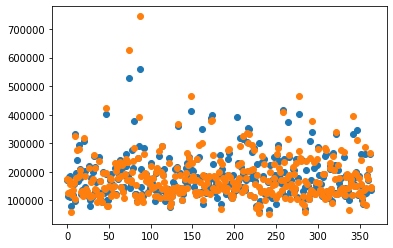

In [54]:
X = range(len(y_pred))
plt.scatter(X, y_pred)
plt.scatter(X, test_y)
plt.show()

In [ ]:
Here I tried SFS, but it took too much time

In [61]:
from sklearn.feature_selection import SequentialFeatureSelector
sffs = SequentialFeatureSelector(
           regressor, n_features_to_select = 10)

sffs.fit(train_feat, train_y)
df = pd.DataFrame.from_dict(sffs.get_metric_dict()).T
df 

KeyboardInterrupt: 

try other feature selection methods like selecting k best features

In [112]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
select = SelectKBest( mutual_info_regression, k=20)
X_new =select.fit_transform(train_feat, train_y)

In [113]:
filter = select.get_support()
filter

array([ True, False,  True, False,  True,  True, False,  True, False,
        True, False,  True, False, False,  True,  True,  True,  True,
       False,  True, False, False,  True, False, False, False,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [108]:
features = np.array(train_feat.columns)

In [114]:
print("All features:")
print(features)
 
print("Selected best 20:")
print(features[filter])

All features:
['LotFrontage' 'LotArea' 'OverallQual' 'OverallCond' 'YearBuilt'
 'YearRemodAdd' 'MasVnrArea' 'ExterQual' 'ExterCond' 'BsmtQual' 'BsmtCond'
 'BsmtFinSF1' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF' 'HeatingQC'
 '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath'
 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr'
 'KitchenQual' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt' 'GarageCars'
 'GarageArea' 'GarageQual' 'GarageCond' 'WoodDeckSF' 'OpenPorchSF'
 'EnclosedPorch' '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold'
 'YrSold' 30 40 45 50 60 70 75 80 85 90 120 160 180 190 'FV' 'RH' 'RL'
 'RM' 'Pave' 'IR2' 'IR3' 'Reg' 'HLS' 'Low' 'Lvl' 'NoSeWa' 'CulDSac' 'FR2'
 'FR3' 'Inside' 'Mod' 'Sev' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr'
 'CollgCr' 'Crawfor' 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel'
 'NAmes' 'NPkVill' 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer'
 'SawyerW' 'Somerst' 'StoneBr' 'Timber' 'Veenker' 'Feedr' 'Norm' 'PosA'
 'PosN' '

In [115]:
regressor.fit(X_new, train_y)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=1,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [116]:
X_test = test_fest[features[filter]]
y_pred = regressor.predict(X_test)
mean_absolute_percentage_error(test_y,y_pred)

0.11268671518958223

couldnt archieve better error, the more features we select the better the results
Try PCA

In [119]:
from sklearn.decomposition import PCA
import sklearn as sklearn
data_pca = sklearn.decomposition.PCA(n_components=20)
data_pca.fit(train_feat)
X_train_reduced = data_pca.transform(train_feat)
regressor.fit(X_train_reduced, train_y)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=1,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [121]:
X_test_reduced = data_pca.transform(test_fest)
y_pred = regressor.predict(X_test_reduced)

In [122]:
mean_absolute_percentage_error(test_y,y_pred)

0.1254744665149522

Error still bigger than xgboost on all features

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(train_feat)
X_test = scaler.transform(test_fest)

[7.33057423e-02 3.56732498e-02 3.06675685e-02 2.48486731e-02
 2.10983320e-02 1.85355050e-02 1.76225570e-02 1.59084708e-02
 1.51653843e-02 1.43826708e-02 1.39912759e-02 1.31038735e-02
 1.27778408e-02 1.23195552e-02 1.21185608e-02 1.19904898e-02
 1.16200245e-02 1.12809807e-02 1.09166475e-02 1.07590658e-02
 1.05886891e-02 1.02704512e-02 1.01322393e-02 9.99191665e-03
 9.65178736e-03 9.62748828e-03 9.25174529e-03 9.04960862e-03
 8.95330709e-03 8.69109354e-03 8.64246869e-03 8.52280157e-03
 8.35520898e-03 8.11012561e-03 8.08321838e-03 8.01468215e-03
 7.94055635e-03 7.59014157e-03 7.51582943e-03 7.46057518e-03
 7.28981504e-03 7.23252861e-03 7.18308903e-03 6.94429407e-03
 6.92130046e-03 6.83754622e-03 6.73139565e-03 6.64196402e-03
 6.58190654e-03 6.48095013e-03 6.31712671e-03 6.28510668e-03
 6.20196020e-03 6.16909841e-03 6.12731588e-03 6.04801028e-03
 6.00104165e-03 5.99639924e-03 5.91188913e-03 5.81053414e-03
 5.76618668e-03 5.73265368e-03 5.67762694e-03 5.60245130e-03
 5.53310974e-03 5.525332

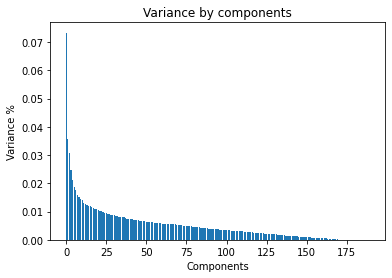

In [124]:
data_pca = sklearn.decomposition.PCA()
data_pca.fit(X_train)
print(data_pca.explained_variance_ratio_)
#plt.bar(range(titanic_pca.explained_variance_.shape[0]),titanic_pca.explained_variance_)

plt.bar(range(data_pca.explained_variance_ratio_.shape[0]),data_pca.explained_variance_ratio_)
plt.title('Variance by components')
plt.xlabel('Components')
plt.ylabel('Variance %')
plt.show()

how much variance is explained by components

XGBoost with searched hyperparameters showed best results with MAPE = 9%, feature selection did not improve the error